In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the csv file
train_data = pd.read_csv('train_data_preprocessed_v3.csv')
test_data = pd.read_csv('test_data_preprocessed_v3.csv')

In [3]:
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

Cross-Validation Scores: [0.66833659 0.97714286 0.97972603 0.97776908 0.98121184]
Mean Cross-Validation Score: 0.9168372792459734
Best Hyperparameters: {'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}
Best Accuracy: 0.9168840707197259


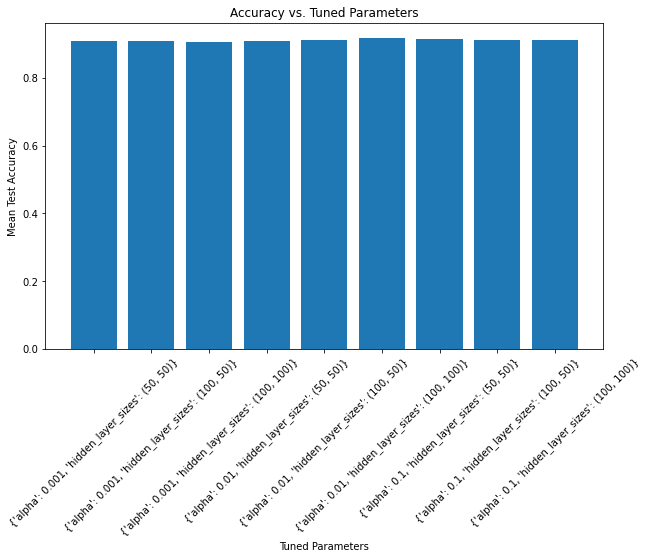

Accuracy on Test Set: 0.8386597368130045
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.39      0.66      0.49      1058
           1       0.95      0.86      0.90      7985

    accuracy                           0.84      9043
   macro avg       0.67      0.76      0.70      9043
weighted avg       0.88      0.84      0.86      9043

Confusion Matrix:
 [[ 695  363]
 [1096 6889]]


In [4]:
# Step 1: Initialize a neural network classifier
clf = MLPClassifier(max_iter=1000, random_state=42)  # You can adjust max_iter as needed

# Step 2: Perform 5-fold cross-validation and record cross-validation scores
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

# Step 3: Choose hyperparameters to tune and define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'alpha': [0.001, 0.01, 0.1],
}

# Step 4: Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Step 5: Print the best hyperparameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Step 6: Plot accuracy vs. tuned parameter values
tuned_parameters = [str(param) for param in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.bar(tuned_parameters, mean_test_scores)
plt.xlabel('Tuned Parameters')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Tuned Parameters')
plt.xticks(rotation=45)
plt.show()

# Step 7: Train the final model with the best hyperparameters
best_clf = MLPClassifier(max_iter=1000, random_state=42, **best_params)
best_clf.fit(x_train, y_train)

# Step 8: Make predictions on the test set
y_pred = best_clf.predict(x_test)

# Step 9: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))

# Step 10: Create and display a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
